<a href="https://colab.research.google.com/github/NorseKidd/Fantasy_Football_Python/blob/main/PandasVOR_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# this is how you view what version of pandas we are running
pd.__version__

'1.1.2'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/fp_projections.csv')

df.head()

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(10)

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5
5,5,Josh Allen,BUF,QB,0.0,0.0,0.0,2.9,115.1,623.5,6.8,525.4,310.4,3533.3,21.3,13.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.4
6,6,Kyler Murray,ARI,QB,0.0,0.0,0.0,1.9,87.3,475.4,3.2,565.4,365.7,3997.8,24.6,12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.4
7,7,Matt Ryan,ATL,QB,0.0,0.0,0.0,3.2,35.1,134.5,1.4,633.1,421.7,4713.5,28.1,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.3
8,8,Drew Brees,NO,QB,0.0,0.0,0.0,0.7,24.0,29.6,1.1,538.8,385.4,4226.4,30.6,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.3
9,9,Aaron Rodgers,GB,QB,0.0,0.0,0.0,2.4,44.7,188.4,1.2,568.8,357.9,4104.8,27.1,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.3


In [ ]:
df[:5]

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [ ]:
df = df.iloc[:, 1:]
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [ ]:
df.columns

Index(['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds', 'ReceivingTD',
       'FL', 'RushingAtt', 'RushingYds', 'RushingTD', 'PassingAtt',
       'PassingCmp', 'PassingYds', 'PassingTD', 'Int', 'FieldGoalsMade',
       'FieldGoalsAttempted', 'ExtraPointsMade', 'TotalSacks', 'TotalInt',
       'FumblesRecovered', 'FumblesForced', 'DefensiveTDs', 'SafetysForced',
       'PointsAllowed', 'FantasyPoints'],
      dtype='object')

In [ ]:
', '.join(df.columns)

'Player, Team, Pos, Receptions, ReceivingYds, ReceivingTD, FL, RushingAtt, RushingYds, RushingTD, PassingAtt, PassingCmp, PassingYds, PassingTD, Int, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade, TotalSacks, TotalInt, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, FantasyPoints'

In [ ]:
scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

In [ ]:
# make sure you add paranthesis around the right side of this expression
# overriding the fantasy points column with our own league settings
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

In [ ]:
#Let's take a look at our df at this point.
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.124
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.384
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.416
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.888
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.462


In [ ]:
# mask our dataframe based off a position

# .loc is a way of getting back specified cross sections of your dataframe.
# The syntax is as follows:
# new_df = old_df.loc[row_indexer, column_indexer]
# Where row_indexer can take the form of a boolean indexer.
# For example, df['Pos'] == 'RB'
# or, df['RushingAtt'] > 20
# or, df['Pos'].isin(['QB', 'WR', 'RB', TE]) # check if a player's position is a skill position
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html # docs on loc
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html # docs on indexing

rb_df = df.loc[df['Pos'] == 'RB']

rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.06
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.79
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.75
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.78
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.98


In [ ]:
base_columns = ['Player', 'Team', 'Pos']
rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL']

"""
Here, we can mask (what we are doing in the row indexer) and filter (what we are doing in the column indexer)
all in one line. Pass in (the boolean indexer, columns you'd like to keep) as a tuple.
Also recall that lists can be concatenated together.
"""
rb_df = df.loc[(df['Pos'] == 'RB', base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
12,Christian McCaffrey,CAR,RB,375.06,102.8,855.8,4.5,252.7,1130.8,8.5,2.2
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7


In [ ]:

"""
The sort_values method of a DataFrame allows us sort our table by a given column.
The 'by' parameter of the function here is a required argument, and it should be the name of 
one of the columns in your table.
The 'ascending' argument is optional. If you want to sort your table from largest to smallest, set
ascending = False to sort in descending order. The object we get back from the sort_values function
is also a pandas DataFrame, and so we can chain methods as we do below with sort_values and head.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
"""

# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6
37,Nick Chubb,CLE,RB,224.94,24.8,191.5,1.1,275.4,1251.9,8.9,2.1
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5
41,Josh Jacobs,LV,RB,222.94,28.5,222.1,0.8,267.4,1186.3,8.8,2.0
36,Joe Mixon,CIN,RB,240.98,39.7,306.2,1.7,269.5,1178.6,7.7,1.8
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7
12,Christian McCaffrey,CAR,RB,375.06,102.8,855.8,4.5,252.7,1130.8,8.5,2.2
45,Chris Carson,SEA,RB,215.87,31.5,245.1,1.3,244.0,1100.6,7.8,2.4
38,Miles Sanders,PHI,RB,249.22,51.7,462.6,2.4,234.7,1050.6,6.0,2.1


In [ ]:
"""
We can use the describe method to get summary/descriptive statistics about our DataFrame extremely quickly
We can also use transpose to switch the columns and index.
# describe docs
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# transpose documentation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
"""

# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,155.0,82.383871,83.097178,1.05,14.74,53.82,125.385,375.06
Receptions,155.0,17.506452,18.480993,0.40,4.05,10.60,24.000,102.80
ReceivingYds,155.0,140.300645,153.581122,3.10,30.30,85.70,198.100,855.80
ReceivingTD,155.0,0.708387,0.882143,0.00,0.10,0.30,1.000,4.50
RushingAtt,155.0,78.225161,82.304474,0.00,6.75,46.70,137.900,294.80
RushingYds,155.0,334.525161,359.322937,2.50,45.80,176.70,559.900,1481.10
RushingTD,155.0,2.428387,2.723008,0.00,0.30,1.20,3.900,12.10
FL,155.0,0.712903,0.757106,0.00,0.00,0.50,1.300,2.70


In [ ]:
"""
This is how you get back a Series object, or column, from your DataFrame.
Here, we just want the first 10 rows of our Series object.
Documentation on pandas Series objects. Below, we cover some aggregate functions we can run
on these Series objects.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
"""

rb_df['RushingAtt'][:10]

12    252.7
23    271.2
25    288.0
26    294.8
30    262.7
33    201.4
35    211.2
36    269.5
37    275.4
38    234.7
Name: RushingAtt, dtype: float64

In [ ]:
rb_df['RushingAtt'].max() # maximum of a Series column 

294.8

In [ ]:
rb_df['RushingAtt'].std() # standard deviation of a Series column

82.30447400184613

In [ ]:
rb_df['RushingAtt'].min() # minimum of a Series column

0.0

In [ ]:
rb_df['RushingAtt'].std() # standard deviation of a Series column

82.30447400184613

In [ ]:
rb_df['RushingAtt'].quantile(0.75) # Series 75th percentile for RushingAtt

137.89999999999998

In [ ]:
rb_df['RushingAtt'].quantile(0.25) # Series 25th percentile for RushingAtt

6.75

In [ ]:
"""
The rank method can be used to rank players based on a given column.
Set ascending = False to rank the column in descending order.
We will be using this rank players on value over replacement and also on ADP.
"""

rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

rb_df.sort_values(by='RushingTDRank').head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4,1.0
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7,2.0
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6,3.0
39,Aaron Jones,GB,RB,239.98,43.2,353.3,2.1,211.7,962.5,9.3,1.6,4.0
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5,5.0


In [ ]:
"""
The value_counts is a Series method can be used to find the number of occurances in a column.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
Notice that the value_counts method is for Series', not DataFrames.
"""
# not running the output as it's too large.
rb_df['RushingAtt'].value_counts()

0.0      7
10.4     2
13.8     2
164.3    2
0.9      2
        ..
16.4     1
225.1    1
10.2     1
216.1    1
288.0    1
Name: RushingAtt, Length: 138, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


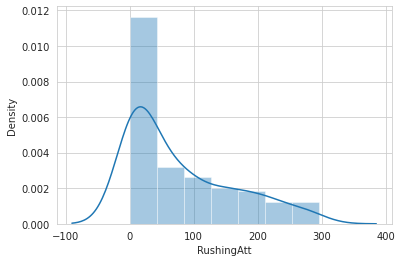

In [ ]:
"""
We can also visualize this data in the same fashion.
"""
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [ ]:
henry = rb_df.loc[rb_df['Player'] == 'Derrick Henry']
# we can grab in
henry = henry.transpose() # transpose the DataFrame
# this is how we rename the index.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.rename.html
henry.index = henry.index.rename('Category') 

"""
This is how we rename the index in pandas. Note that length of our original columns was 1, and the list you 
set equal to df.columns must have the same length as the original column index. Otherwise, a ValueError will
be thrown.
"""
henry.columns = ['Value'] 
henry

,Value
Category,
Player,Derrick Henry
Team,TEN
Pos,RB
FantasyPoints,261.78
Receptions,21.5
ReceivingYds,183.7
ReceivingTD,1
RushingAtt,294.8
RushingYds,1481.1


In [ ]:
"""
values is how we get back a Numpy array representation of our data. Underneath the hood of Pandas,
DataFrames are multi-dimensional arrays. We will cover Numpy arrays in more detail in the machine learning section.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html
"""
rb_df.values

array([['Christian McCaffrey', 'CAR', 'RB', ..., 8.5, 2.2, 8.0],
       ['Saquon Barkley', 'NYG', 'RB', ..., 9.0, 1.5, 5.0],
       ['Ezekiel Elliott', 'DAL', 'RB', ..., 9.5, 2.6, 3.0],
       ...,
       ['Elijah McGuire', 'KC', 'RB', ..., 0.0, 0.0, 148.5],
       ['Trenton Cannon', 'CAR', 'RB', ..., 0.0, 0.0, 148.5],
       ['Damarea Crockett', 'GB', 'RB', ..., 0.0, 0.0, 148.5]],
      dtype=object)

In [ ]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0) # set index col = 0 to set the range index as our dataframes index

adp_df.head()

,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Saquon Barkley,RB,2.0
2,Ezekiel Elliott,RB,3.5
3,Michael Thomas,WR,4.0
4,Dalvin Cook,RB,5.0


In [ ]:
# Let's add a column for ADP rank, as the AVG column only tells us their average ADP doesn't tell us much
# we're more interested in the order of the AVG column than the average itself.
adp_df['ADP RANK'] = adp_df['AVG'].rank()

adp_df.head()

,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [ ]:
adp_df_cutoff = adp_df[:100]

# shape get's us back a tuple with the number of rows, and number of columns
# you can also use the Python built-in function len() to find the number of rows.

# print(len(adp_dp_cutoff))

adp_df_cutoff.shape

(100, 4)

In [ ]:
# initialize an empty dictionary.
# this is where we are going to save our replacement players

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

"""
We can iterate over our DataFrame using the iterrows method.
It's similar to the items method for dictionary looping.
Instead of key, values in dict.items(), we get back the index, row in df.items()
Here, we're using _ as the placeholder value for the index. Whenever you do not use a variable when looping,
you should use _ as a placeholder to tell yourself later and other people reading your code that this is a 
dummy variable. This is good style.
Using iterrows, we can iterate over our DataFrame, and get access to each row's column values.
We can access these column value much like we would values in a dictionary, using the [] notation.
Here, we are constantly re-setting the keys in the dict we instantiated above with the most recent player from 
our loop, if their position is in replacement_players keys (in other words, if they are a WR, RB, TE, or qb)
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
"""

for _, row in adp_df_cutoff.iterrows():
    
    position = row['POS'] # extract out the position and player value from each row as we loop through it
    player = row['PLAYER']
    
    if position in replacement_players: # if the position is in the dict's keys
        replacement_players[position] = player # set that player as the replacement player

In [ ]:
replacement_players

{'QB': 'Aaron Rodgers',
 'RB': 'Latavius Murray',
 'TE': 'Rob Gronkowski',
 'WR': 'Jamison Crowder'}

In [ ]:
"""
This is how we filter out columns in pandas without using loc.
The syntax is as follows
df = df[columns_wed_like_to_keep_in_list_form]
"""
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']] # filtering out the columns we need.
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.124
1,Patrick Mahomes,QB,KC,345.384
2,Dak Prescott,QB,DAL,318.416
3,Deshaun Watson,QB,HOU,312.888
4,Russell Wilson,QB,SEA,308.462


In [ ]:
replacement_values = {} # initialize an empty dictionary

for position, player_name in replacement_players.items():
    
    player = df.loc[df['Player'] == player_name]
    
    # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
    # we tack on a [0] to get the value we need.
    
    replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [ ]:
replacement_values

{'QB': 277.432, 'RB': 118.62, 'TE': 139.5, 'WR': 192.27999999999997}

In [ ]:
"""
the isin method lets us check if a value is in a list
and can be passed as a boolean indexer / row filter / mask
here, we want to filter out all those rows who's position column is not in
['QB', 'RB', 'WR', 'TE']
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
""" 

# this will be explained in the next chapter
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1
)

In [ ]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Lamar Jackson,QB,BAL,361.124,83.692
1,Patrick Mahomes,QB,KC,345.384,67.952
2,Dak Prescott,QB,DAL,318.416,40.984
3,Deshaun Watson,QB,HOU,312.888,35.456
4,Russell Wilson,QB,SEA,308.462,31.030


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_rows', None) # turn off truncation of rows setting inherent to pandas

df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,256.440,1.0
23,Saquon Barkley,RB,NYG,310.790,192.170,2.0
25,Ezekiel Elliott,RB,DAL,299.750,181.130,3.0
33,Alvin Kamara,RB,NO,295.950,177.330,4.0
30,Dalvin Cook,RB,MIN,289.980,171.360,5.0
26,Derrick Henry,RB,TEN,261.780,143.160,6.0
34,Michael Thomas,WR,NO,333.180,140.900,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,135.610,8.0
43,Austin Ekeler,RB,LAC,252.900,134.280,9.0
38,Miles Sanders,RB,PHI,249.220,130.600,10.0


In [ ]:
"""
the pandas groupby method allows us to groupby a specific column, called "splitting",
then apply a summary function over to each group. We can split this up by column as well, by tacking
on ['ColumName'] after grouping and before applying the summary function.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
"""

df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,-176.720337,122.762942,-277.432,-272.7440,-265.39,-33.736,83.692
RB,155.0,-36.236129,83.097178,-117.570,-103.8800,-64.80,6.765,256.440
TE,128.0,-81.878203,54.454555,-139.500,-122.0725,-104.45,-50.840,115.940
WR,245.0,-114.184694,79.501235,-192.280,-181.1000,-151.34,-52.910,140.900


In [ ]:
# standard score example. Notice axis is not set to 1 as we are applying a function across a column here.
# df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].mean()) / df['VOR'].std())

df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [ ]:
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.790,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.750,0.858936,3.0
33,Alvin Kamara,RB,NO,295.950,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.980,0.840636,5.0
26,Derrick Henry,RB,TEN,261.780,0.787814,6.0
34,Michael Thomas,WR,NO,333.180,0.783581,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,0.773672,8.0
43,Austin Ekeler,RB,LAC,252.900,0.771181,9.0
38,Miles Sanders,RB,PHI,249.220,0.764288,10.0


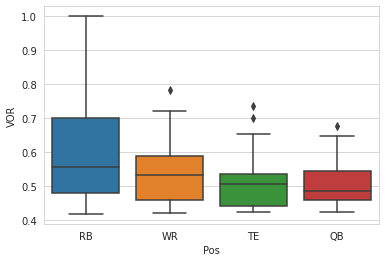

In [ ]:
import seaborn as sns # in case you did not import it above

# calculating how many players are in our draft pool.
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [ ]:
# let's rename our VOR column to just Value.
# remember, to make a change to our DataFrame, you set it equal to itself + some modifcation
# we can use the rename method here to help us do that
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1) # axis = 1 means make the change along the column axis.

In [ ]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1) # let's rename some columns first.

In [ ]:
"""
the merge function allows us to combine DataFrames together column wise on common columns.
Here, we are left joining. Which means any entries that exist in the right table (adp_df) but
do not exist in the left table (df) get dropped from the final table.
We want to join the two DataFrames together where the Player and Pos columns match up.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
Also, you may want to take a look at join, which is similar
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
"""

final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0


In [ ]:
# let's calculate the difference between our value rank and adp rank
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']
final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0,0.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0,0.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0,0.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0,2.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0,0.0


In [ ]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [ ]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
65,Ryquell Armstead,RB,JAC,140.35,0.560363,66.0,138.5,136.0,70.0
80,Antonio Gibson,RB,WAS,129.26,0.539590,81.0,141.0,140.0,59.0
138,Darrynton Evans,RB,TEN,90.65,0.467269,139.0,193.5,191.0,52.0
30,Ronald Jones II,RB,TB,179.79,0.634238,31.0,83.0,78.0,47.0
35,Tarik Cohen,RB,CHI,171.24,0.618223,36.0,87.5,83.0,47.0
74,Duke Johnson,RB,HOU,134.83,0.550023,75.0,125.0,121.0,46.0
104,Adrian Peterson,RB,WAS,114.31,0.511587,105.0,147.0,147.0,42.0
58,Kerryon Johnson,RB,DET,149.42,0.577352,59.0,100.0,98.5,39.5
40,James White,RB,NE,166.68,0.609682,41.0,75.5,74.0,33.0
33,Kareem Hunt,RB,CLE,174.14,0.623655,34.0,60.0,64.5,30.5


In [ ]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
230,Justice Hill,RB,BAL,37.94,0.368538,231.0,202.0,200.0,-31.0
202,Rashaad Penny,RB,SEA,57.46,0.405101,203.0,181.0,179.0,-24.0
128,Ke'Shawn Vaughn,RB,TB,100.07,0.484914,129.0,108.5,110.0,-19.0
132,Alexander Mattison,RB,MIN,95.05,0.475511,133.0,123.0,118.0,-15.0
108,Sony Michel,RB,NE,111.23,0.505818,109.0,96.5,95.0,-14.0
96,J.K. Dobbins,RB,BAL,119.25,0.520840,97.0,88.0,85.5,-11.5
223,Jaylen Samuels,RB,PIT,40.89,0.374063,224.0,214.0,216.0,-8.0
172,A.J. Dillon,RB,GB,72.61,0.433478,173.0,166.5,166.5,-6.5
188,Damien Harris,RB,NE,66.53,0.422090,189.0,187.0,185.0,-4.0
11,Joe Mixon,RB,CIN,240.98,0.748854,12.0,10.0,9.0,-3.0


In [ ]:
# top 10 WR sleepers for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
177,Cole Beasley,WR,BUF,144.38,0.429938,178.0,217.5,219.0,41.0
127,Golden Tate,WR,NYG,174.00,0.485420,128.0,139.0,137.0,9.0
39,Robert Woods,WR,LAR,241.44,0.611742,40.0,46.0,46.0,6.0
157,Breshad Perriman,WR,NYJ,155.10,0.450018,158.0,162.5,160.5,2.5
196,Corey Davis,WR,TEN,135.67,0.413623,197.0,200.0,198.0,1.0
164,Hunter Renfrow,WR,LV,150.09,0.440634,165.0,165.0,165.0,0.0
99,Jamison Crowder,WR,NYJ,192.28,0.519660,99.5,100.0,98.5,-1.0
6,Michael Thomas,WR,NO,333.18,0.783581,7.0,4.0,4.0,-3.0
130,Preston Williams,WR,MIA,172.03,0.481730,131.0,130.0,128.0,-3.0
218,Randall Cobb,WR,HOU,119.51,0.383354,219.0,213.5,215.0,-4.0


In [ ]:
# top 10 WR overvalued for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
357,Denzel Mims,WR,NYJ,77.01,0.303747,358.0,179.0,177.0,-181.0
394,Devin Duvernay,WR,BAL,63.90,0.279191,395.0,212.0,214.0,-181.0
316,Willie Snead,WR,BAL,85.29,0.319256,317.0,217.0,218.0,-99.0
271,John Ross,WR,CIN,97.67,0.342445,272.0,182.0,180.0,-92.0
287,Kenny Stills,WR,HOU,92.78,0.333286,288.0,203.0,202.5,-85.5
213,Mecole Hardman,WR,KC,123.03,0.389947,214.0,139.5,138.0,-76.0
178,Justin Jefferson,WR,MIN,144.34,0.429863,179.0,108.5,110.0,-69.0
228,Alshon Jeffery,WR,PHI,112.02,0.369324,229.0,162.5,160.5,-68.5
251,Parris Campbell,WR,IND,102.75,0.351961,252.0,188.5,186.5,-65.5
274,James Washington,WR,PIT,96.22,0.339729,275.0,216.0,217.0,-58.0


In [ ]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
143,Greg Olsen,TE,SEA,109.24,0.462980,144.0,210.5,211.0,67.0
120,Ian Thomas,TE,CAR,125.52,0.493474,121.0,180.5,178.0,57.0
106,Chris Herndon IV,TE,NYJ,132.66,0.506848,107.0,164.0,163.5,56.5
166,Irv Smith Jr.,TE,MIN,96.64,0.439379,167.0,202.5,201.0,34.0
121,Blake Jarwin,TE,DAL,123.75,0.490159,122.0,158.0,156.0,34.0
118,Jack Doyle,TE,IND,126.34,0.495010,119.0,153.5,152.0,33.0
89,Mike Gesicki,TE,MIA,145.07,0.530093,90.0,124.5,120.0,30.0
116,Jonnu Smith,TE,TEN,127.09,0.496415,117.0,145.5,145.5,28.5
85,Hayden Hurst,TE,ATL,148.28,0.536106,86.0,113.0,113.0,27.0
87,Jared Cook,TE,NO,146.40,0.532585,88.0,108.5,110.0,22.0


In [ ]:
# top 10 TE overvalued for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
98,Rob Gronkowski,TE,TB,139.50,0.519660,99.5,89.0,89.5,-10.0
21,George Kittle,TE,SF,235.49,0.699460,22.0,20.5,21.5,-0.5
13,Travis Kelce,TE,KC,255.44,0.736828,14.0,17.0,18.0,4.0
41,Mark Andrews,TE,BAL,187.53,0.609626,42.0,47.0,47.0,5.0
90,Austin Hooper,TE,CLE,144.42,0.528876,91.0,103.0,101.0,10.0
64,Hunter Henry,TE,LAC,161.64,0.561131,65.0,80.5,77.0,12.0
66,Tyler Higbee,TE,LAR,160.66,0.559295,67.0,84.0,79.0,12.0
26,Zach Ertz,TE,PHI,210.87,0.653344,27.0,39.0,39.5,12.5
60,Evan Engram,TE,NYG,169.05,0.575010,61.0,75.5,74.0,13.0
110,T.J. Hockenson,TE,DET,131.98,0.505574,111.0,129.5,126.5,15.5


In [ ]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
113,Cam Newton,QB,NE,267.554,0.501158,114.0,211.0,212.5,98.5
135,Gardner Minshew II,QB,JAC,251.500,0.471087,136.0,174.5,172.0,36.0
159,Teddy Bridgewater,QB,CAR,239.328,0.448287,160.0,194.0,192.5,32.5
176,Derek Carr,QB,LV,229.760,0.430365,177.0,203.0,202.5,25.5
129,Ryan Tannehill,QB,TEN,258.048,0.483352,130.0,143.5,143.0,13.0
149,Kirk Cousins,QB,MIN,245.184,0.459256,150.0,163.5,162.0,12.0
68,Josh Allen,QB,BUF,297.482,0.557216,69.0,85.5,80.5,11.5
55,Deshaun Watson,QB,HOU,312.888,0.586073,56.0,67.5,67.0,11.0
185,Sam Darnold,QB,NYJ,226.866,0.424945,186.0,199.0,196.5,10.5
147,Jimmy Garoppolo,QB,SF,245.542,0.459927,148.0,160.0,158.5,10.5
